In [1]:
import networkx as nx
import matplotlib.pyplot as plt


from functions import *
from noisy_graphs import *
from sample_graphs import *
from frank_wolfe import *

In [2]:
G = nx.read_edgelist('./graphs/collaboration_astrophysics')
A = nx.adjacency_matrix(G).todense()
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 18772
Number of edges: 198110


In [3]:
Gprime = nx.Graph.copy(G)
B = nx.adjacency_matrix(Gprime)

# now run your algorithm on (G, Gprime) or on (A, B) !
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 18772
Number of edges: 198110


In [29]:
# G and Gprime are too big in memory for computation
# new dataset

n = 20
p = 0.4

A_eq, b_eq =  bistochastic_equality_constraints(n)

G0, A0 = sample_Erdos_Renyi(n, p) #same graphs ???
G1, A1 = sample_Erdos_Renyi(n, 1 - p)

Ps = rand_perm_matrix(20)


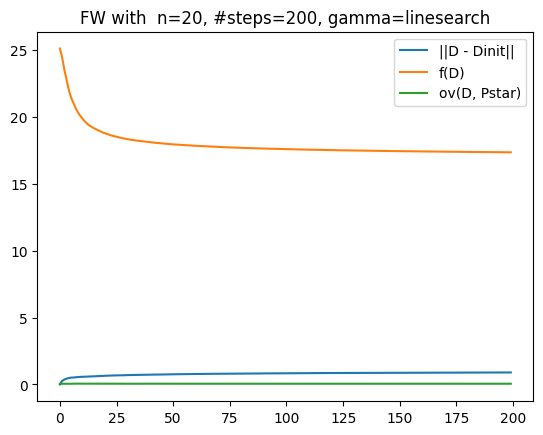

[[0.26603926 0.00798646 0.00798646 0.07819713 0.03915656 0.17934579
  0.00798646 0.00798646 0.00798646 0.02756784 0.17466921 0.00798646
  0.01420322 0.03639879 0.00798646 0.00798646 0.00798646 0.00798646
  0.00798646 0.0965711 ]
 [0.00798646 0.091391   0.08879644 0.00798646 0.01536858 0.00798646
  0.1002828  0.05995719 0.00798646 0.01075979 0.00798646 0.07747591
  0.04800437 0.09319023 0.08047621 0.06517488 0.11610718 0.09711017
  0.00798646 0.00798646]
 [0.00798646 0.08890182 0.14964544 0.00798646 0.00798646 0.00798646
  0.13626096 0.06159822 0.10200006 0.00798646 0.00798646 0.04751236
  0.04170546 0.00798646 0.05620244 0.07488693 0.01806078 0.05726432
  0.1020695  0.00798646]
 [0.08252233 0.01154149 0.00798646 0.06476915 0.09737007 0.12853464
  0.00798646 0.01742977 0.00798646 0.10738224 0.08113978 0.03260558
  0.0604833  0.07139982 0.02168048 0.0367289  0.00798646 0.05033945
  0.00798646 0.0961407 ]
 [0.13205308 0.00798646 0.00798646 0.1609826  0.09730751 0.05508302
  0.00798646 0.0

In [30]:
#Frank_wolfe algorithm

D = frank_wolfe(A0, A1, 200, Pstar=Ps , method="mindiff",plot=True)
print(D)
# with D, we will try to create a 

In [35]:
Dp = project_to_perm(D, A_eq, b_eq)

# we want to see how Dp appair these two graphs

print(A0.toarray() - A1.toarray())


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  1. -0.
   0.  0.]
 [ 0.  0.  1.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
   1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. -0.  0.
   0.  0.]
 [-0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.